In [3]:
import os
import tweepy
import sys
import pandas as pd
import datetime
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
import re
from tqdm import tqdm
from textblob import TextBlob 
import glob
from pathlib import Path
pd.set_option('display.max_colwidth', -1)

In [11]:
def get_tweet_sentiment_polarity_num(tweet): 
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity

def clean_tweet(tweet): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+_)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 

In [16]:
def preprocess_twitter_PPC_accounts(filename):
    df = pd.read_csv(filename)    
    
    df.tweet_text = df.tweet_text.astype(str)
    
    for i, row in df.iterrows():
        df.loc[i, 'score_num'] = get_tweet_sentiment_polarity_num(df.loc[i, 'tweet_text']) 
            
    df.to_csv('preprocessed/ppc_accounts_timeline_year_sentiment_polarity.csv')

In [17]:
# preprocess_twitter_PPC_accounts('dataset/ppc_accounts_timeline_year_sentiment.csv')

In [20]:
df = pd.read_csv('preprocessed/ppc_accounts_timeline_year_sentiment_polarity.csv')
df = df[df.score_num != 0.0]
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,user_name,tweet_text,user_followers,user_location,user_verified,like_count,rt_count,timestamp,score,party,score_num
2,2,2,2,1201625600152293376,Jeremy Corbyn,RT @labourunionsuk The future of our NHS is on the ballot paper next week. And if the Tories win it'll be on the table in a Trump Trade…,2235831,UK,True,0,882,2019-12-02 22:14:02,positive,Labour,0.266667
4,4,4,4,1201590952554639362,Jeremy Corbyn,Thank you Simon I couldn't agree more,2235831,UK,True,4988,1566,2019-12-02 19:56:22,positive,Labour,0.500000
5,5,5,5,1201583266924564480,Jeremy Corbyn,Artists have the ability to connect people with politics in a deeply profound way. I thank the musicians who have spoken out about the choice facing our communities and how we can bring about a more equal society.,2235831,UK,True,4766,1512,2019-12-02 19:25:49,positive,Labour,0.194444
8,8,8,8,1201550500384124933,Jeremy Corbyn,RT @UKLabour The Conservatives stole the miners pension fund. Labour will right this historic wrong and bring justice to mineworkers htt…,2235831,UK,True,0,2067,2019-12-02 17:15:37,negative,Labour,-0.071429
9,9,9,9,1201533366169997312,Jeremy Corbyn,We’ve just announced the biggest ever rail fares cut of 33%. That’s real change,2235831,UK,True,11836,3532,2019-12-02 16:07:32,positive,Labour,0.200000


In [37]:
def yearly_tweet_sentiment_per_party(filename):
    data = pd.read_csv(filename)
    sns.set(rc={'figure.figsize':(20, 10)})
    parties = data.party.unique()
    data['month_year'] = pd.to_datetime(data['timestamp']).dt.to_period('D')

    for party in parties:
        df_party = data[data.party == party]
        counts = df_party.groupby('month_year')['score_num'].mean()
        labels = [str(c) for c in counts.index]
        chart = sns.lineplot(x=labels, y=counts.values,label=party)
        
    chart.set_xticklabels(labels, rotation = 45)

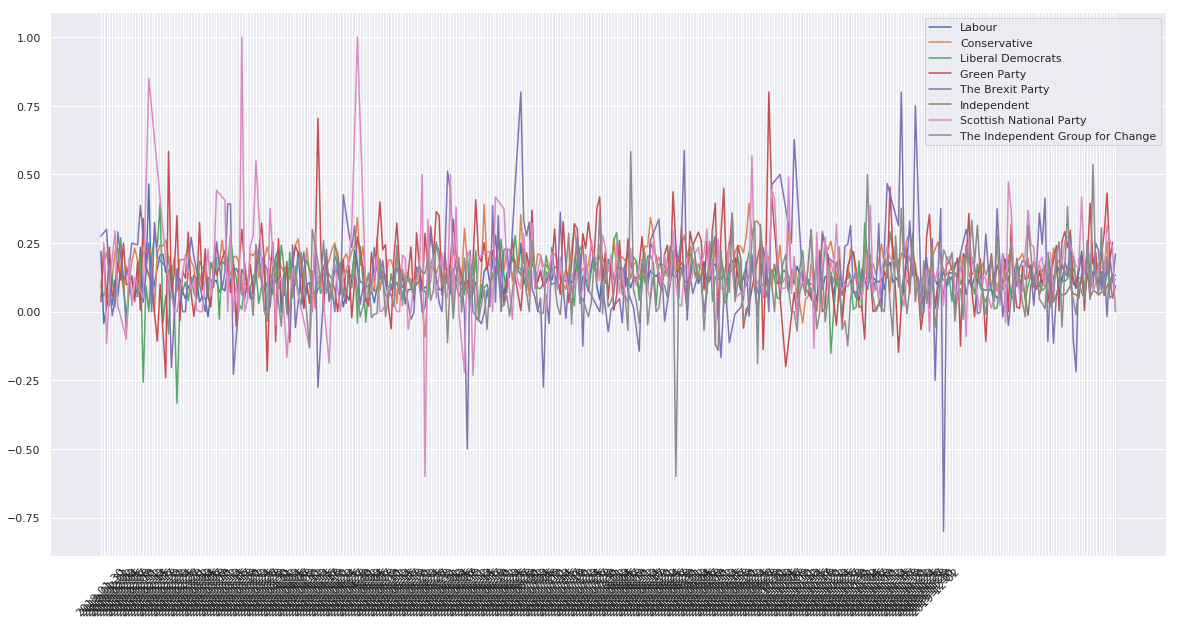

In [38]:
yearly_tweet_sentiment_per_party('preprocessed/ppc_accounts_timeline_year_sentiment_polarity.csv')

In [ ]:
`